In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.decomposition import PCA
import pylab
from alpha_vantage.timeseries import TimeSeries

# Задание 1 

Загрузите дневные котировки 3 акций (Apple, Google, Facebook) из открытых источников за последние 10 лет.

Для однозначности используйте цены закрытия.

In [4]:
# open API key
key = open('/home/arcry/alfa test/alpha_vant_key.txt').read()
ts = TimeSeries(key, output_format='pandas')

In [5]:
# get symbol for Google
ts.get_symbol_search('googl')

(           1. symbol                 2. name 3. type      4. region  \
 date                                                                  
 1970-01-01     GOOGL  Alphabet Inc - Class A  Equity  United States   
 
            5. marketOpen 6. marketClose 7. timezone 8. currency 9. matchScore  
 date                                                                           
 1970-01-01         09:30          16:00      UTC-04         USD        1.0000  ,
 None)

In [22]:
# get data for Google
data_google, meta_google = ts.get_daily_adjusted('GOOGL', outputsize='full')
data_google.to_csv('/home/arcry/alfa test/google_price.csv')


In [23]:
# выберем столбец закрытий торгов и возьмем котировку за последние 10 лет.
data_google = data_google['4. close']
data_google = data_google[data_google.index >= '2011-06-15']

In [24]:
data_google

date
2021-06-16    2415.45
2021-06-15    2428.39
2021-06-14    2448.91
2021-06-11    2430.20
2021-06-10    2435.13
               ...   
2011-06-21     493.00
2011-06-20     484.58
2011-06-17     485.02
2011-06-16     500.37
2011-06-15     502.95
Name: 4. close, Length: 2518, dtype: float64

In [9]:
# get symbol for Apple
ts.get_symbol_search('apple inc')

(                                1. symbol    2. name 3. type  \
 date                                                           
 1970-01-01 00:00:00.000000000        AAPL  Apple Inc  Equity   
 1970-01-01 00:00:00.000000001  AAPL34.SAO  Apple Inc  Equity   
 1970-01-01 00:00:00.000000002     APC.DEX  Apple Inc  Equity   
 1970-01-01 00:00:00.000000003     APC.FRK  Apple Inc  Equity   
 
                                       4. region 5. marketOpen 6. marketClose  \
 date                                                                           
 1970-01-01 00:00:00.000000000     United States         09:30          16:00   
 1970-01-01 00:00:00.000000001  Brazil/Sao Paolo         10:00          17:30   
 1970-01-01 00:00:00.000000002             XETRA         08:00          20:00   
 1970-01-01 00:00:00.000000003         Frankfurt         08:00          20:00   
 
                               7. timezone 8. currency 9. matchScore  
 date                                            

In [25]:
# get data for Apple
data_apple, meta_apple = ts.get_daily_adjusted('AAPL', outputsize='full')
data_apple.to_csv('/home/arcry/alfa test/apple_price.csv')

In [26]:
# выберем столбец закрытий торгов и возьмем котировку за последние 10 лет.
data_apple = data_apple['4. close']
data_apple = data_apple[data_apple.index >= '2011-06-15']

In [27]:
data_apple

date
2021-06-16    130.15
2021-06-15    129.64
2021-06-14    130.48
2021-06-11    127.35
2021-06-10    126.11
               ...  
2011-06-21    325.30
2011-06-20    315.32
2011-06-17    320.26
2011-06-16    325.16
2011-06-15    326.75
Name: 4. close, Length: 2518, dtype: float64

In [13]:
# get symbol for Facebook
ts.get_symbol_search('facebook')

(                                1. symbol                 2. name 3. type  \
 date                                                                        
 1970-01-01 00:00:00.000000000    FB2A.DEX                Facebook  Equity   
 1970-01-01 00:00:00.000000001    FB2A.FRK                Facebook  Equity   
 1970-01-01 00:00:00.000000002  FBOK34.SAO                Facebook  Equity   
 1970-01-01 00:00:00.000000003          FB  Facebook Inc - Class A  Equity   
 
                                       4. region 5. marketOpen 6. marketClose  \
 date                                                                           
 1970-01-01 00:00:00.000000000             XETRA         08:00          20:00   
 1970-01-01 00:00:00.000000001         Frankfurt         08:00          20:00   
 1970-01-01 00:00:00.000000002  Brazil/Sao Paolo         10:00          17:30   
 1970-01-01 00:00:00.000000003     United States         09:30          16:00   
 
                               7. timezone

In [28]:
data_fb, meta_fb = ts.get_daily_adjusted('FB', outputsize='full')
data_fb.to_csv('/home/arcry/alfa test/facebook_price.csv')

In [29]:
# выберем столбец закрытий торгов.
data_fb = data_fb['4. close']

Facebook провела IPO в 18 мая 2012 года.
С этого момента можно скачать котировки.

In [30]:
data_fb

date
2021-06-16    331.0800
2021-06-15    336.7500
2021-06-14    336.7700
2021-06-11    331.2600
2021-06-10    332.4600
                ...   
2012-05-24     33.0300
2012-05-23     32.0000
2012-05-22     31.0000
2012-05-21     34.0300
2012-05-18     38.2318
Name: 4. close, Length: 2284, dtype: float64

# Задание 2 

Посчитайте daily returns

Посчитайте статистики распределения return-ов.

Для каждой акции:

- Оцените, пожалуйста, схожесть полученного распределения дневных returns и одного из известных распределений – например, Gaussian, Student-t с n степенями свободы и т.д. Используйте визуальные и статистические критерии.
-Распределение доходностей стационарно по времени? 
-Есть ли взаимосвязь между прошлыми и будущими значениями временного ряда для отдельно выбранной акции? Если да, то значима ли она (для 1 акции)?

Есть ли интересные взаимосвязи между return-ами  различных инструментов в один и тот же период по времени? (Предположение: поиск корреляции, Granger causality, PCA decomposition of returns)


In [31]:
# count dayly returns
returns_fb = ((data_fb.shift(1) - data_fb) / data_fb)[1:] # FB returns
returns_apple = ((data_apple.shift(1) - data_apple) / data_apple)[1:] # Apple returns
returns_google = ((data_google.shift(1) - data_google) / data_google)[1:] # Google returns

In [190]:
# defs for drawing plots
def draw_plot(data, title = None, ylabel = 'returns'):
    plt.figure(figsize=(12, 8))
    plt.plot(data)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('year', fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.grid()
    plt.show()
    
def draw_distplot(data, title = None):
    plt.figure(figsize=(12, 8))
    sns.distplot(data)
    plt.title(f'Distribution of {title} returns', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('returns', fontsize=14)
    plt.grid()
    plt.show()

In [191]:
# test whether a sample differs from a normal distribution
def normal_check(data):
    stat, p = stats.normaltest(data)
    print("Statistics = %.3f, p=%.3f" % (stat,p))
    alpha = 0.05
    if p> alpha:
        print('Data looks Gaussian (fail to reject null hypothesis)')
    else:
        print('Data looks non-Gaussian (reject null hypothesis)')

## Facebook statistics and distributions

Посмотрим на распределение данных во времени и построим распределение вероятности.

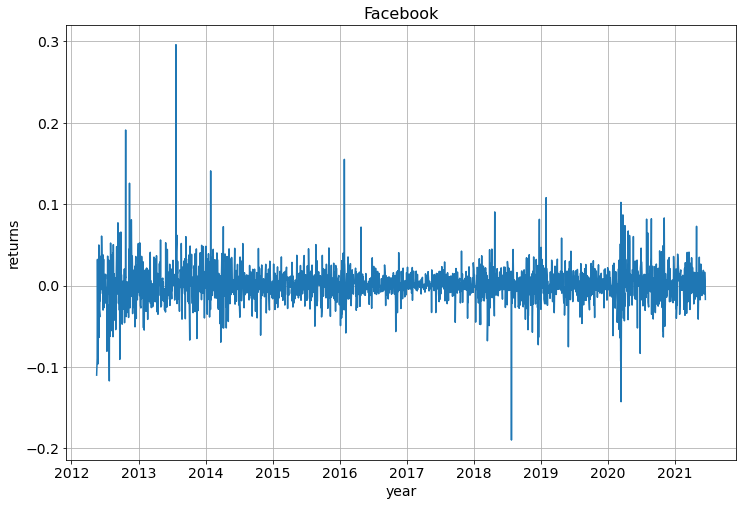

In [135]:
draw_plot(returns_fb, 'Facebook')

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


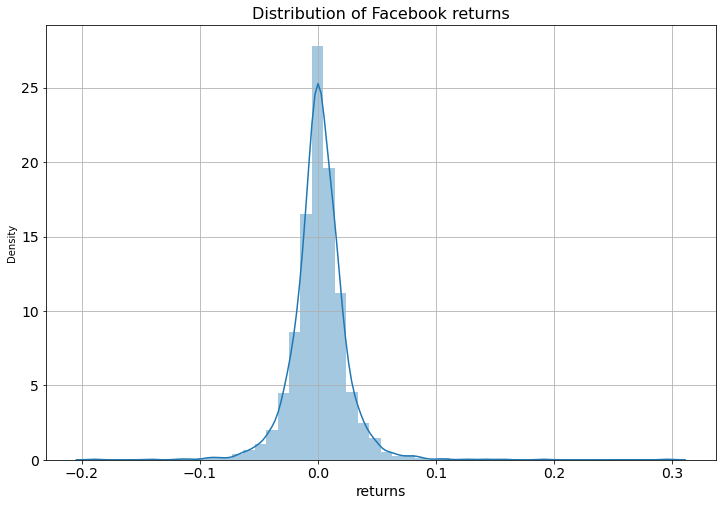

In [130]:
draw_distplot(returns_fb, 'Facebook')

Визуально распределение напоминает распределение Стьюдента.

В исходных данных присутствуют выбросы, для оценки параметров уберем их.

In [214]:
# Наблюдаемое отклонение от среднего
dev_fb = (returns_fb - returns_fb.mean()).abs()
# Стандартное отклонение
std_fb = returns_fb.std()
# Фильтруем исходный набор данных
returns_fb_trimmed = returns_fb[~(dev_fb>3*std_fb)]

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


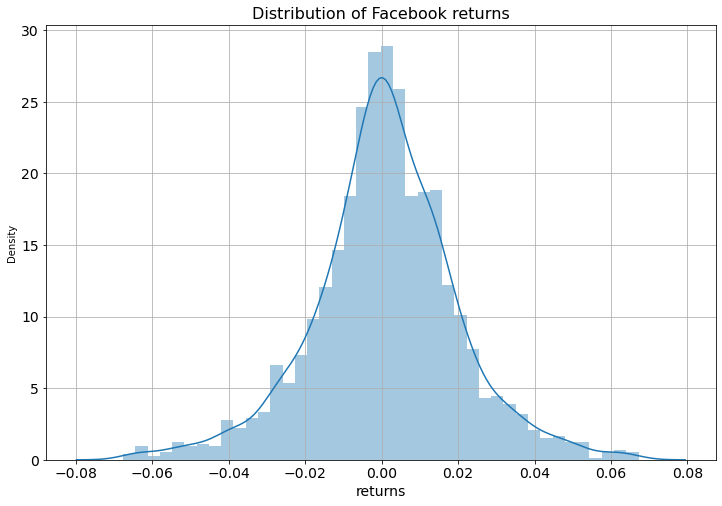

In [198]:
draw_distplot(returns_fb_trimmed, 'Facebook')

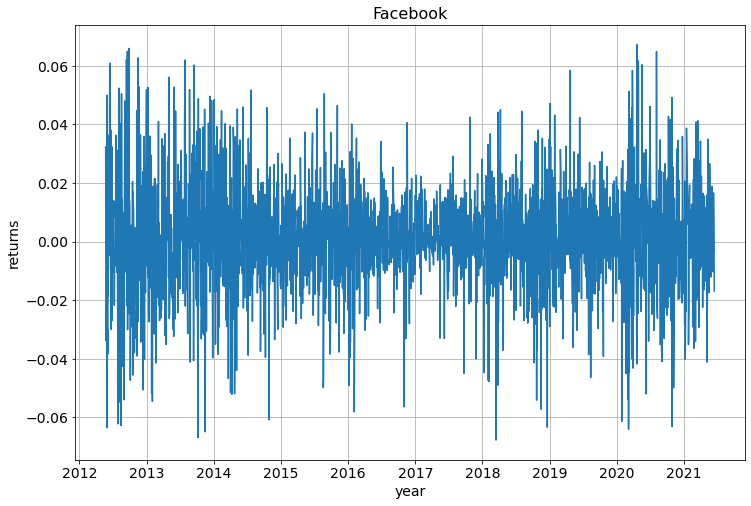

In [199]:
draw_plot(returns_fb_trimmed, 'Facebook')

Распределение стационарно по времени.
Статистические свойства свойства процесса, изменяющегося со временем, не меняются.

In [200]:
# определим 1, 2 моменты и квантили
returns_fb_trimmed.describe()

count    2250.000000
mean        0.000931
std         0.019029
min        -0.067697
25%        -0.009192
50%         0.001051
75%         0.012043
max         0.067213
Name: 4. close, dtype: float64

In [231]:
# определим 3 и 4 моменты (skew и kurtosis)
print('returns_fb_trimmed', round(returns_fb_trimmed.skew(), 6))
print('returns_fb_trimmed', round(pd.Series.kurtosis(returns_fb_trimmed), 6))

returns_fb_trimmed -0.09428
returns_fb_trimmed 1.202513


In [232]:
# Оценка взаимосвязи при сдвиге на 1 день
pd.Series.autocorr(returns_fb_trimmed)

-0.04272888721538545

Взаимосвязи нет

In [46]:
# проверка на нормальность распределения тестом д'Агостино
normal_check(returns_fb_trimmed)

Statistics = 60.897, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [47]:
# проверка нормальность распределения тестом Шапиро
shapiro_test_fb = stats.shapiro(returns_fb_trimmed)
shapiro_test_fb

ShapiroResult(statistic=0.9834610819816589, pvalue=1.6783339515792466e-15)

Выборка данных не имеет распределение Гаусса.

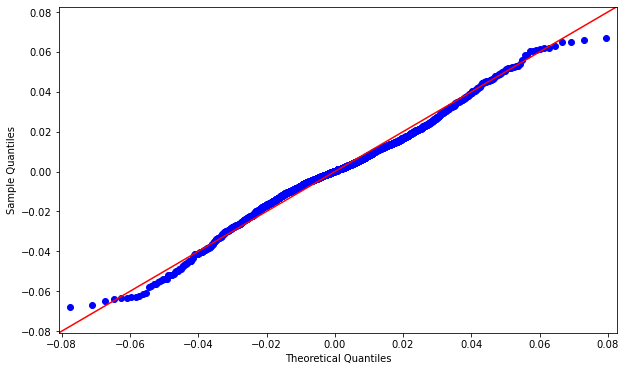

In [202]:
# построим QQ-plot для проверки имеют ли данные распределение t-Student.
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    sm.qqplot(returns_fb_trimmed, stats.t, distargs=(15,),  loc=returns_fb_trimmed.mean(),
                scale=returns_fb_trimmed.std(), line="45")
    plt.show()

Выборка данных имеет распределение, похожее на распределение Стьюдента.

## Apple statistics and distributions

Посмотрим на распределение данных во времени и построим распределение вероятности.

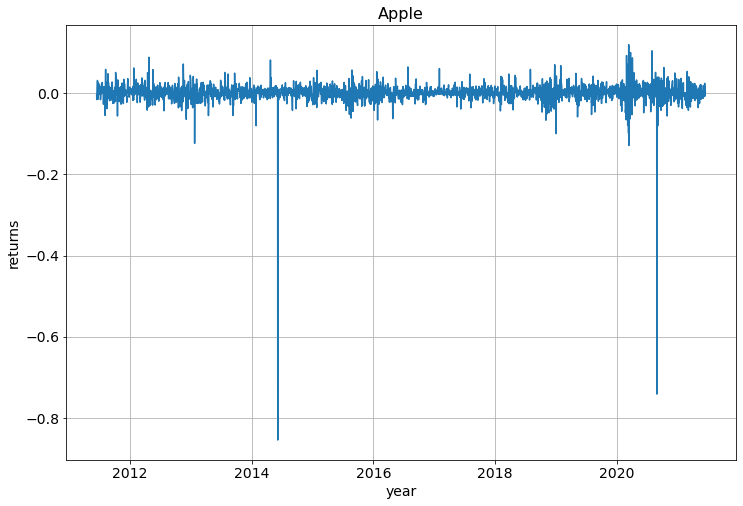

In [204]:
draw_plot(returns_apple, 'Apple')

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


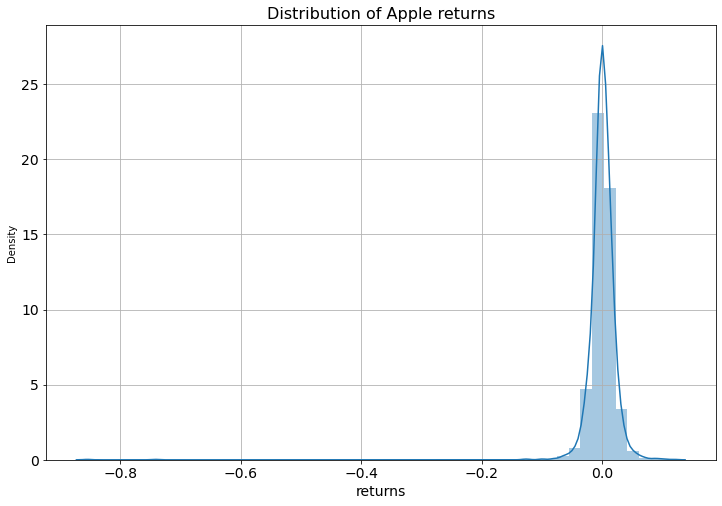

In [205]:
draw_distplot(returns_apple, 'Apple')

Визуально распределение напоминает распределение Стьюдента.

В исходных данных присутствуют выбросы, для оценки параметров уберем их.

In [50]:
# Наблюдаемое отклонение от среднего
dev_apple = (returns_apple - returns_apple.mean()).abs()
# Стандартное отклонение
std_apple = returns_apple.std()
# Фильтруем исходный набор данных
returns_apple_trimmed = returns_apple[~(dev_apple>3*std_apple)]

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


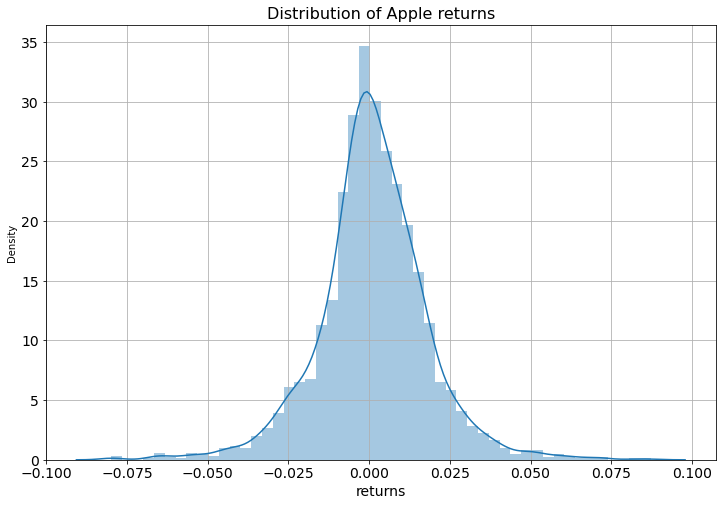

In [208]:
draw_distplot(returns_apple_trimmed, 'Apple')

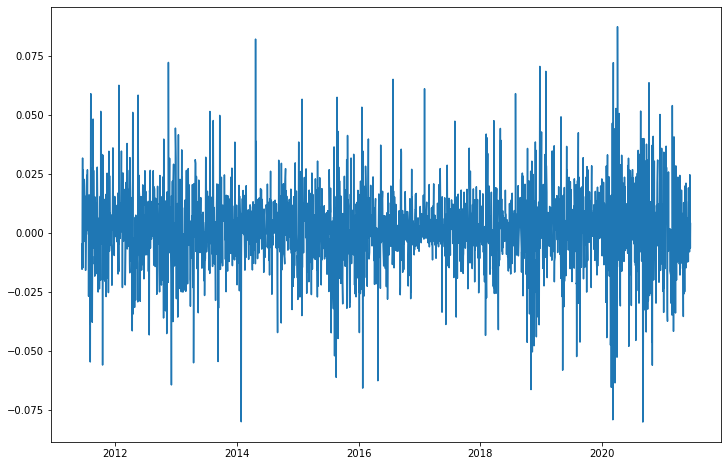

In [72]:
draw_plot(returns_apple_trimmed, 'Apple')

Распределение стационарно по времени.
Статистические свойства свойства процесса, изменяющегося со временем, не меняются.

In [209]:
# определим 1, 2 моменты и квантили
returns_apple_trimmed.describe()

count    2506.000000
mean        0.001086
std         0.016969
min        -0.080061
25%        -0.007277
50%         0.000756
75%         0.010341
max         0.087237
Name: 4. close, dtype: float64

In [221]:
# определим 3 и 4 моменты (skew и kurtosis)
print('skew', round(returns_apple_trimmed.skew(), 6))
print('kurtosis', round(pd.Series.kurtosis(returns_apple_trimmed), 6))

skew -0.056977
kurtosis 2.705671


In [230]:
# Оценка взаимосвязи при сдвиге на 1 день
pd.Series.autocorr(returns_apple_trimmed)

-0.02672753005052683

Взаимосвязи нет

In [53]:
# проверка на нормальность распределения тестом д'Агостино
normal_check(returns_apple_trimmed)

Statistics = 165.048, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [54]:
# проверка на нормальность распределения тестом Шапиро
shapiro_test_fb = stats.shapiro(returns_apple_trimmed)
shapiro_test_fb

ShapiroResult(statistic=0.9662583470344543, pvalue=8.740979571188663e-24)

Выборка данных не имеет распределение Гаусса.

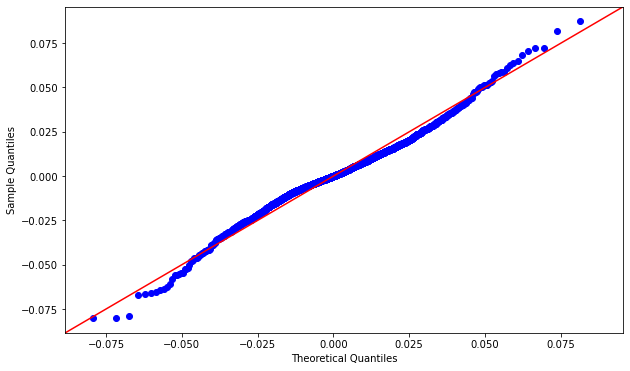

In [211]:
# построим QQ-plot для проверки имеют ли данные распределение t-Student.
with mpl.rc_context():
    mpl.rc("figure", figsize=(10,6))
    sm.qqplot(returns_apple_trimmed, stats.t, distargs=(10,),  loc=returns_apple_trimmed.mean(),
                scale=returns_apple_trimmed.std(), line="45")
    plt.show()

Выборка данных имеет распределение, похожее на распределение Стьюдента.

## Google statistics and distributions

Посмотрим на распределение данных во времени и построим распределение вероятности.

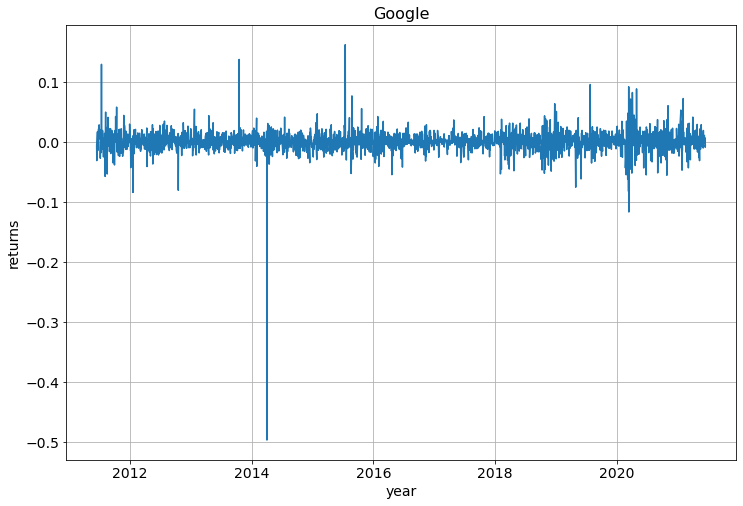

In [212]:
draw_plot(returns_google, 'Google')

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


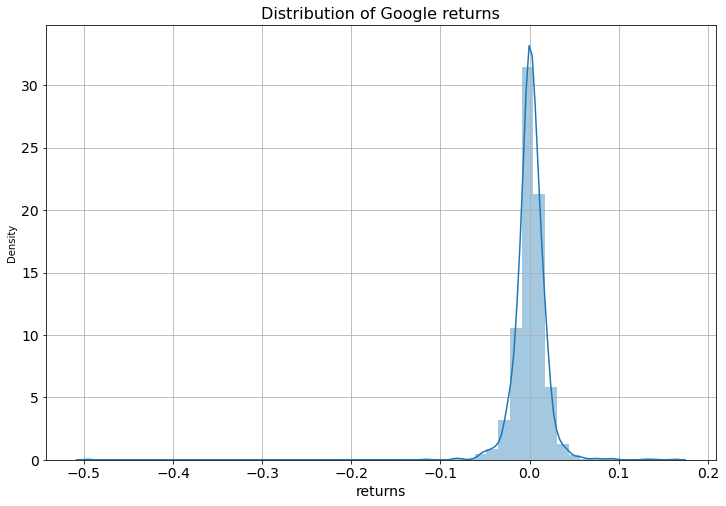

In [213]:
draw_distplot(returns_google, 'Google')

Визуально распределение напоминает распределение Стьюдента.

В исходных данных присутствуют выбросы, для оценки параметров уберем их.

In [57]:
# Наблюдаемое отклонение от среднего
dev_google = (returns_google - returns_google.mean()).abs()
# Стандартное отклонение
std_google = returns_google.std()
# Фильтруем исходный набор данных
returns_google_trimmed = returns_google[~(dev_google>3*std_google)]

/home/arcry/anaconda3/envs/myenv/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


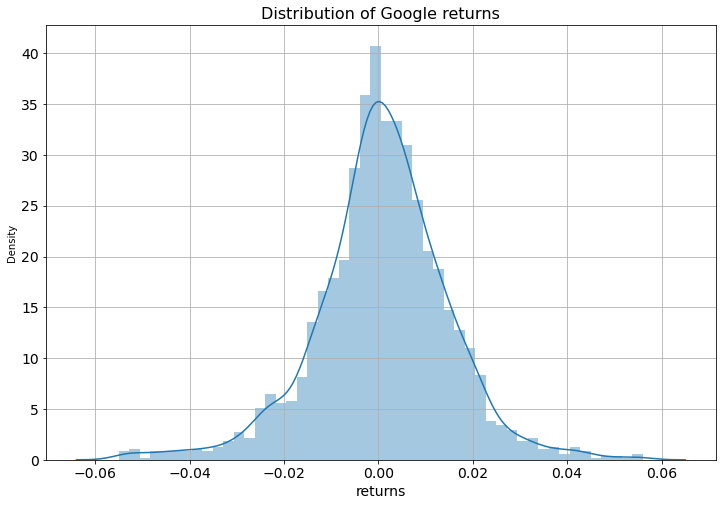

In [216]:
draw_distplot(returns_google_trimmed, 'Google')

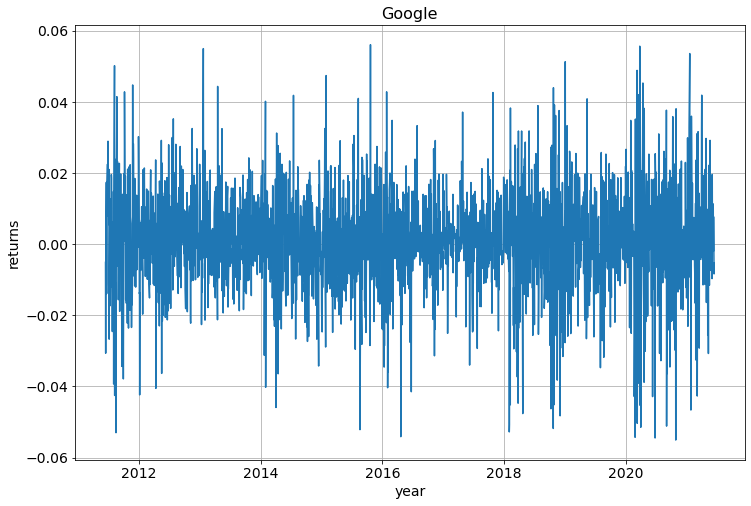

In [215]:
draw_plot(returns_google_trimmed, 'Google')

Распределение стационарно по времени. Статистические свойства свойства процесса, изменяющегося со временем, не меняются.

In [220]:
# определим 1, 2 моменты и квантили
returns_google_trimmed.describe()

count    2495.000000
mean        0.000807
std         0.014229
min        -0.055089
25%        -0.006377
50%         0.000928
75%         0.008964
max         0.056068
Name: 4. close, dtype: float64

In [222]:
# определим 3 и 4 моменты (skew и kurtosis)
print('skew', round(returns_google_trimmed.skew(), 6))
print('kurtosis', round(pd.Series.kurtosis(returns_google_trimmed), 6))

skew -0.258317
kurtosis 1.781929


In [235]:
# Оценка взаимосвязи при сдвиге на 1 день
pd.Series.autocorr(returns_google_trimmed)

-0.02835702099460927

Взаимосвязи нет

In [223]:
# проверка на нормальность распределения тестом д'Агостино
normal_check(returns_google_trimmed)

Statistics = 130.740, p=0.000
Data looks non-Gaussian (reject null hypothesis)


Выборка данных не имеет распределение Гаусса.

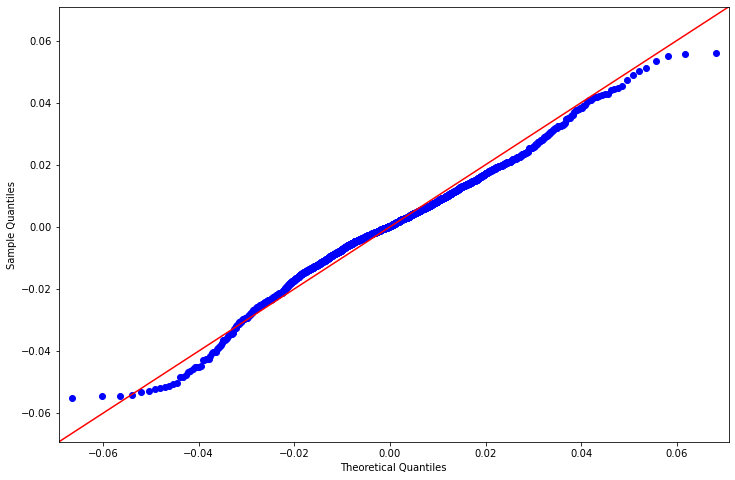

In [62]:
# построим QQ-plot для проверки имеют ли данные распределение t-Student.
with mpl.rc_context():
    mpl.rc("figure", figsize=(12,8))
    sm.qqplot(returns_google_trimmed, stats.t, distargs=(10,),  loc=returns_google_trimmed.mean(),
                scale=returns_google_trimmed.std(), line="45")
    plt.show()

Выборка данных имеет распределение, похожее на распределение Стьюдента.

## Выводы

1. Returns акций всех компаний имеют распределение похожее на распределение Стьюдента
и не имеют нормального распределения.


2. Все распределения доходностей стационарны во времени.


3. Взаимосвязи между прошлыми и будущими значениями временного ряда для отдельно выбранной акции нет. Автокорреляции практически нулевые.

#  Задание 3

Предположим, каждый день вы получаете предсказание $f_i$ величины $r_i$

Введем понятие Profit-and-loss (pnl) для каждого дня:
$pnl_i = f_i * r_i$

Пусть $f_i$  имеет распределение standard Gaussian с mean = 0 и std = 1. 

Задача: Сгенерируйте несколько случайных реализаций $f_i$, постройте графики $pnl_i$  и $cumsum(pnl_i)$ 

In [227]:
# Зададим mean = 0 и std = 1
mu, sigma = 0, 1

## Facebook Profit-and-Loss

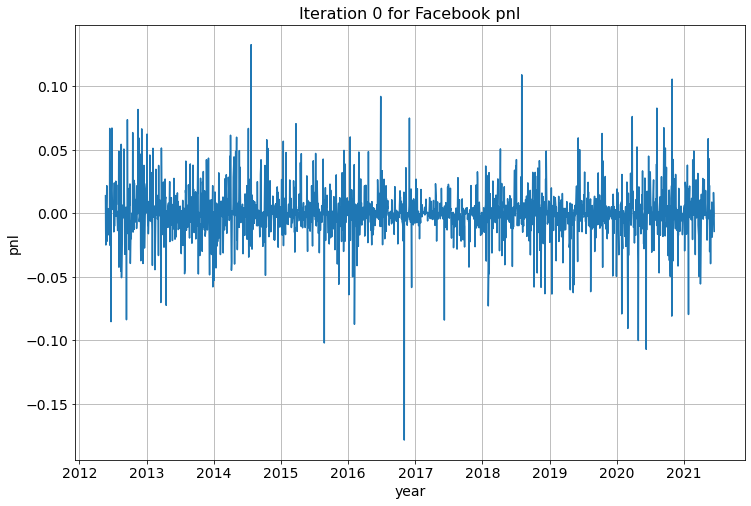

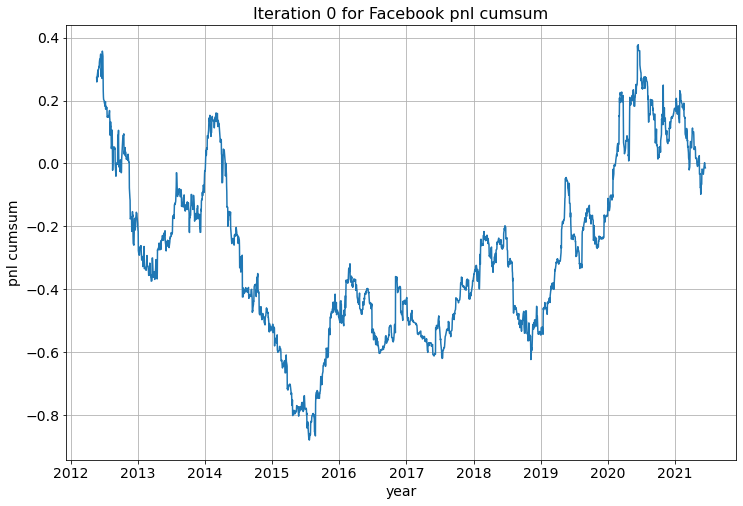

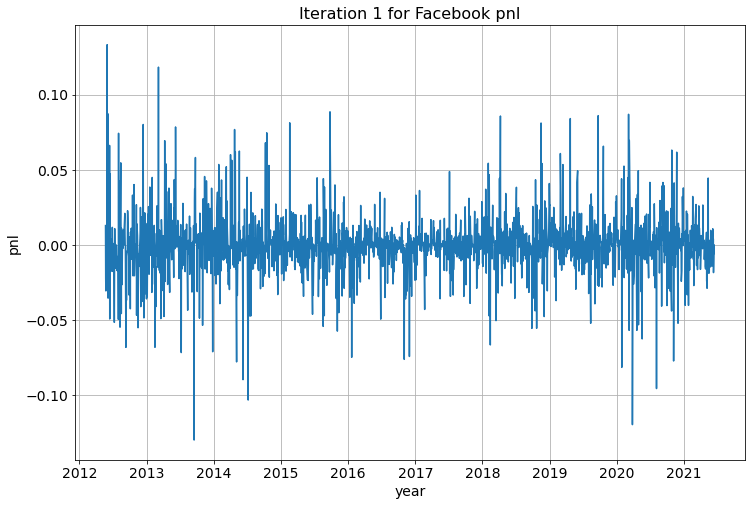

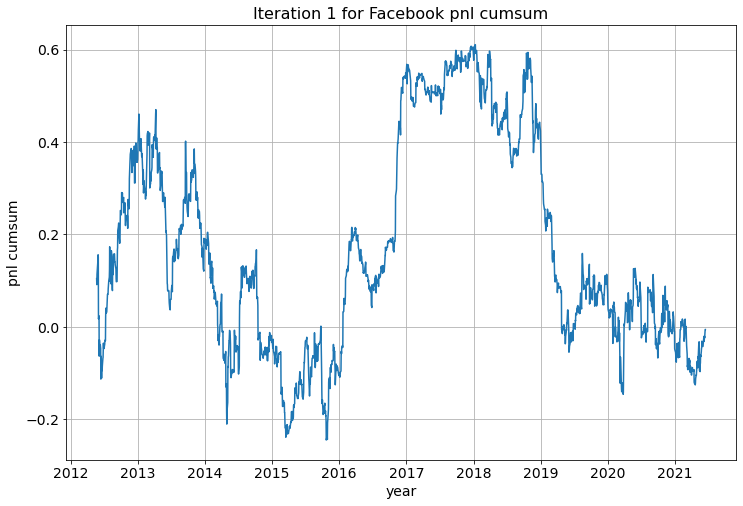

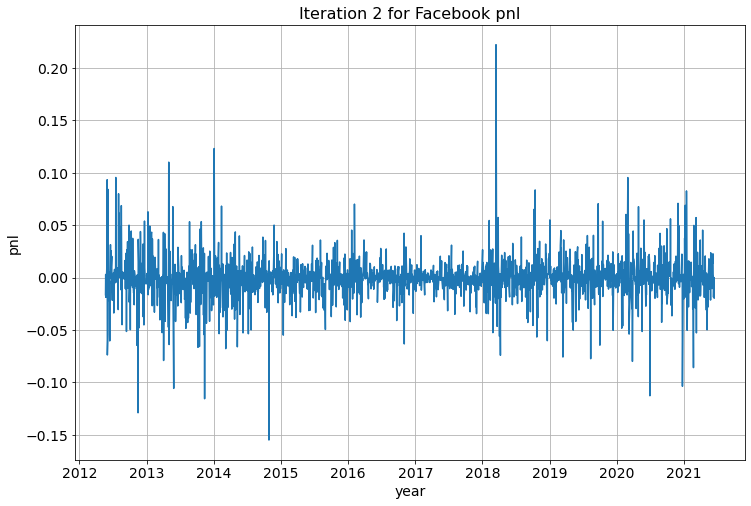

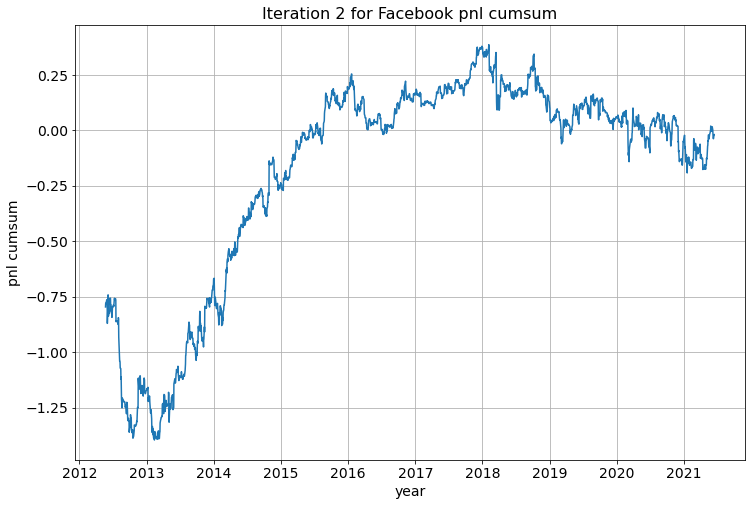

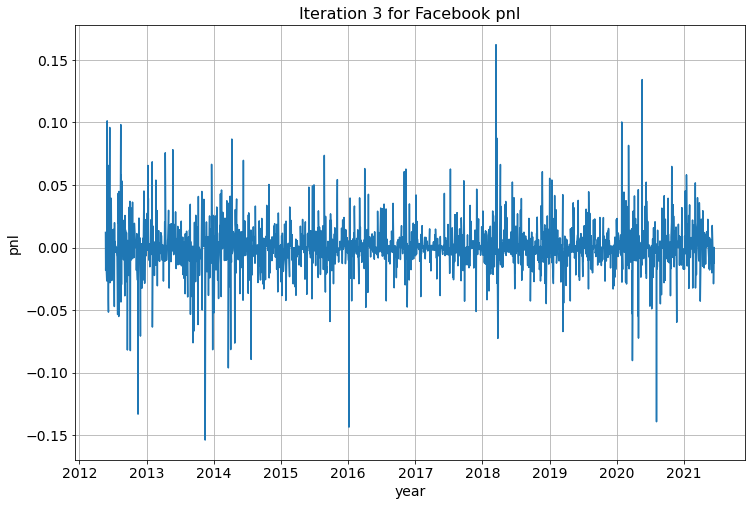

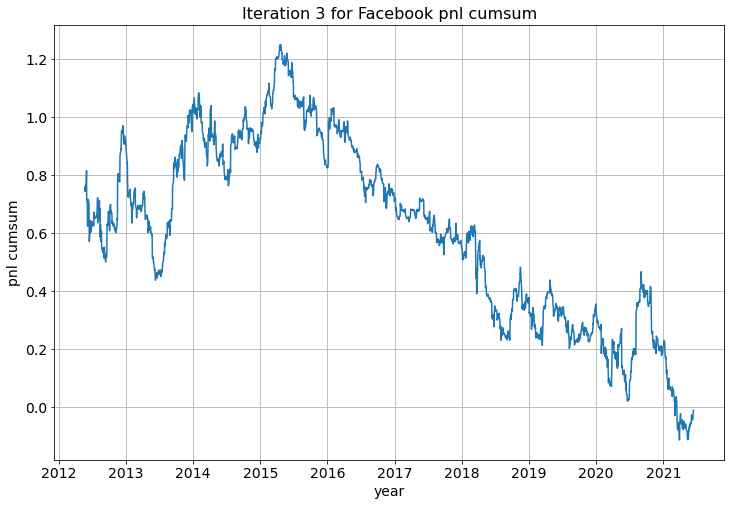

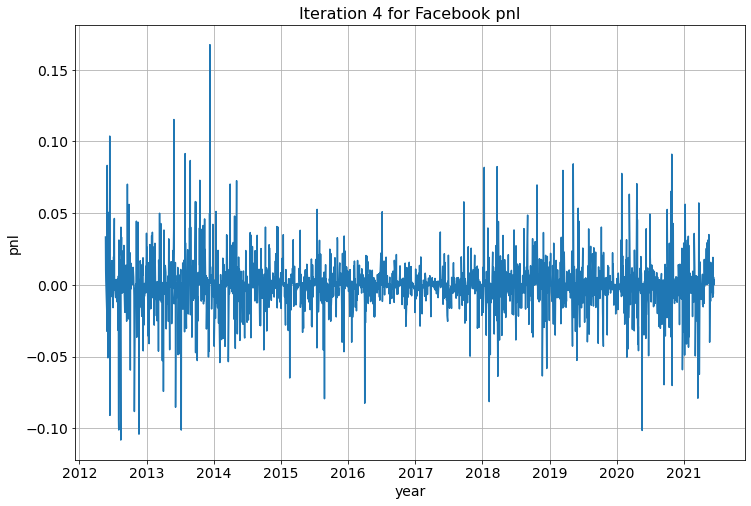

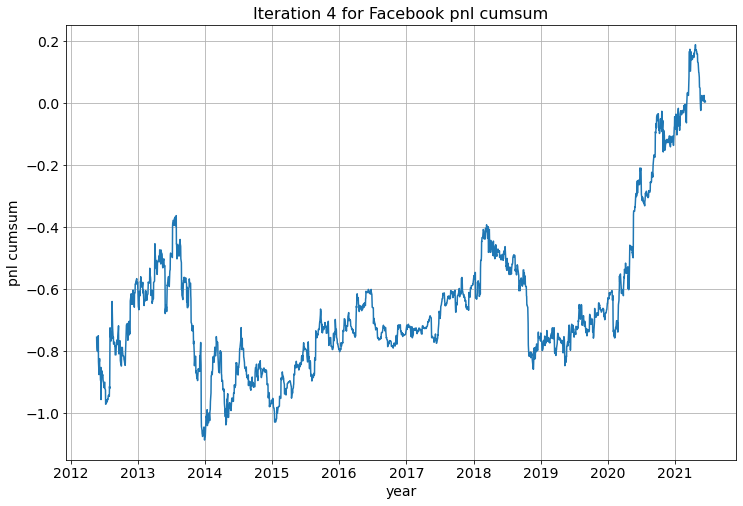

In [241]:
for i in range(5):
    f = np.random.normal(mu, sigma, len(returns_fb_trimmed))
    pnl = f * returns_fb_trimmed
    pnl_cumsum = np.cumsum(pnl)
    draw_plot(pnl, f'Iteration {i+1} for Facebook pnl', 'pnl')
    draw_plot(pnl_cumsum, f'Iteration {i+1} for Facebook pnl cumsum', 'pnl cumsum')


## Apple Profit-and-Loss

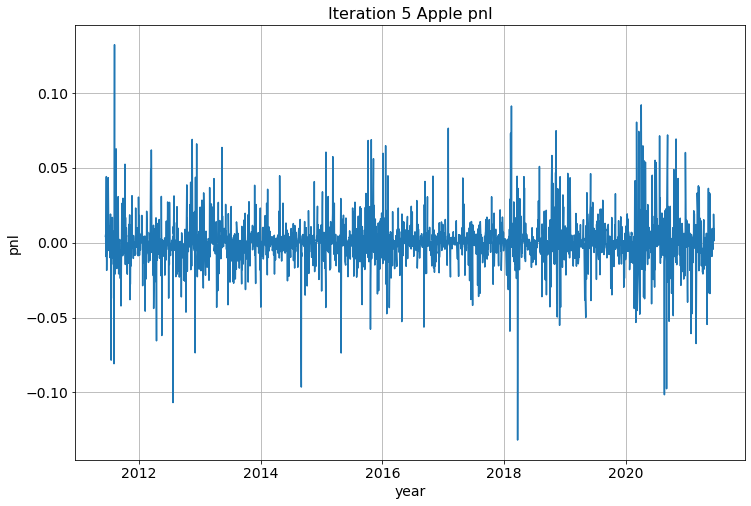

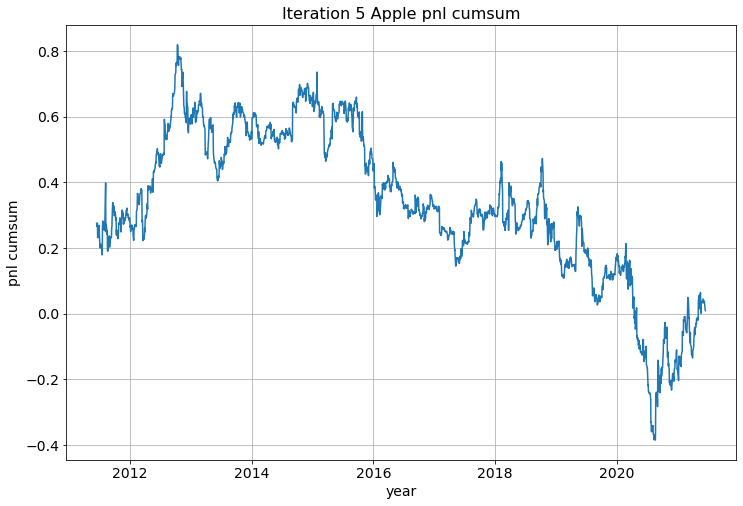

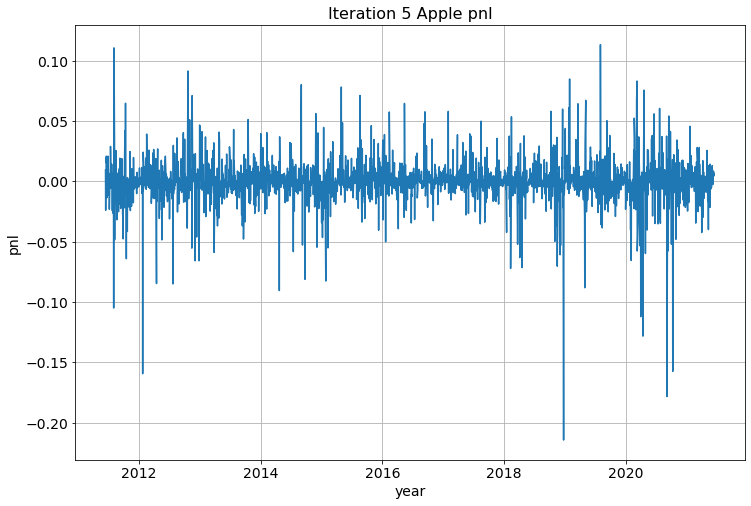

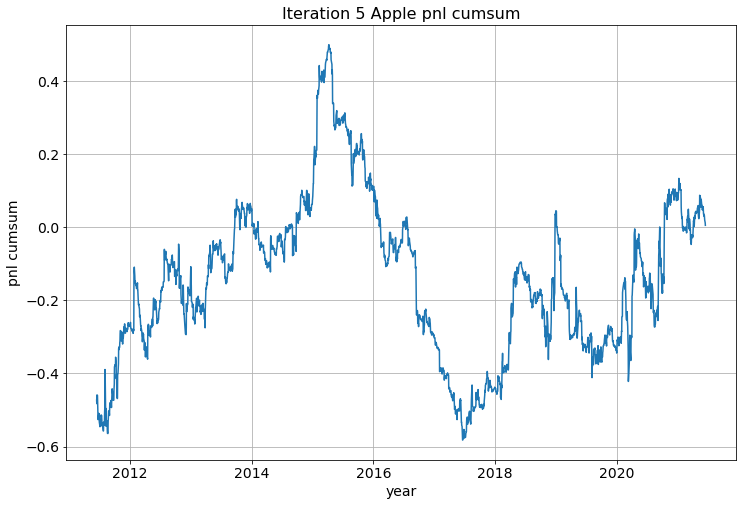

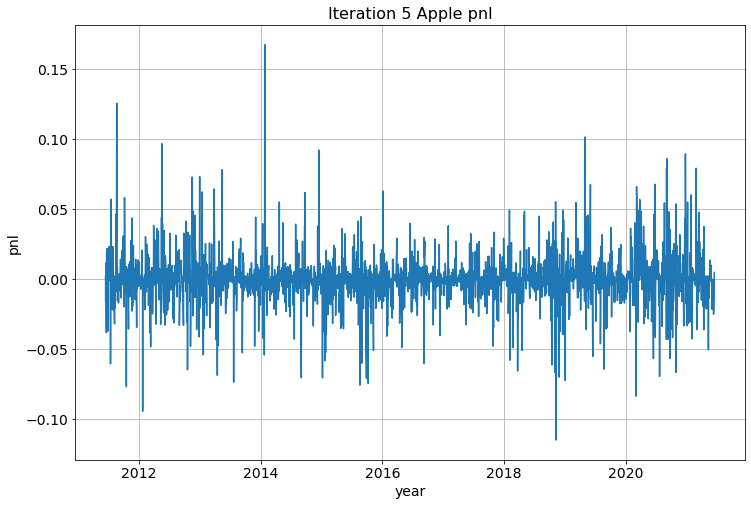

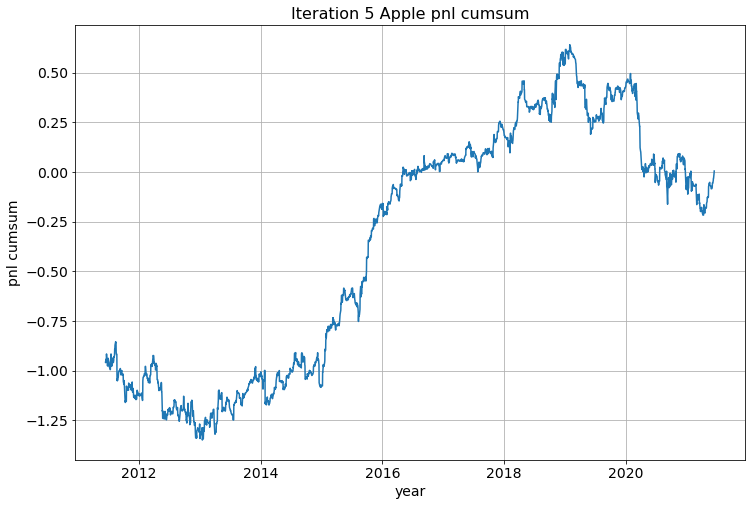

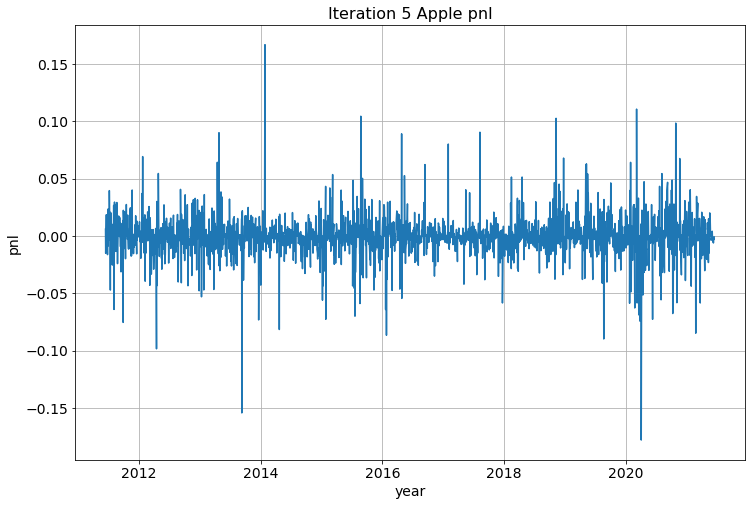

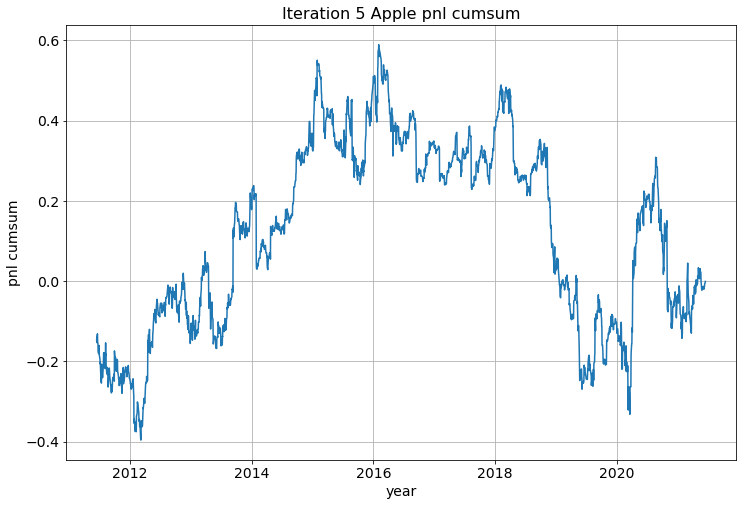

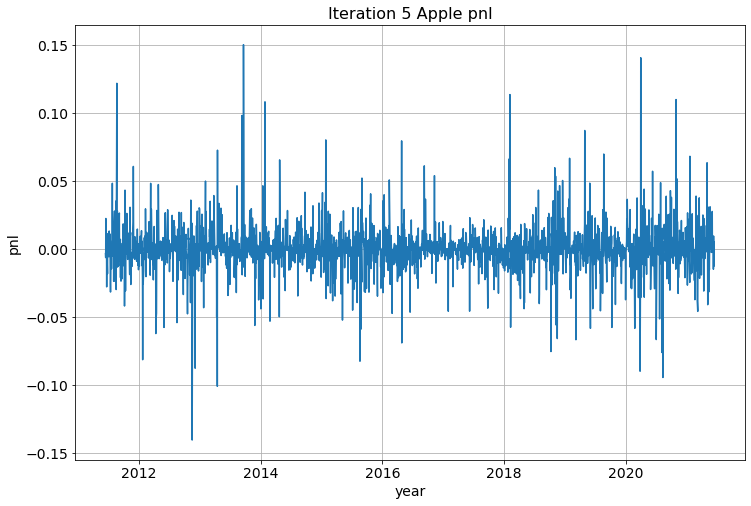

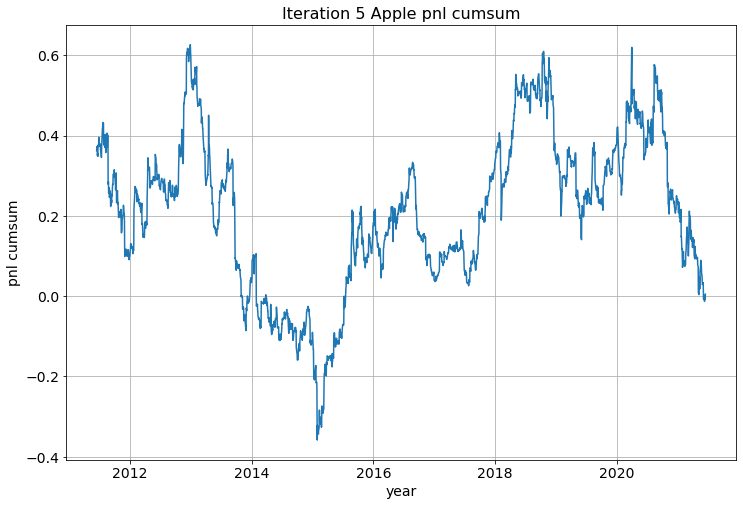

In [243]:
for _ in range(5):
    f = np.random.normal(mu, sigma, len(returns_apple_trimmed))
    pnl = f * returns_apple_trimmed
    pnl_cumsum = np.cumsum(pnl)
    draw_plot(pnl, f'Iteration {i+1} Apple pnl', 'pnl')
    draw_plot(pnl_cumsum, f'Iteration {i+1} Apple pnl cumsum', 'pnl cumsum')


## Google Profit-and-Loss

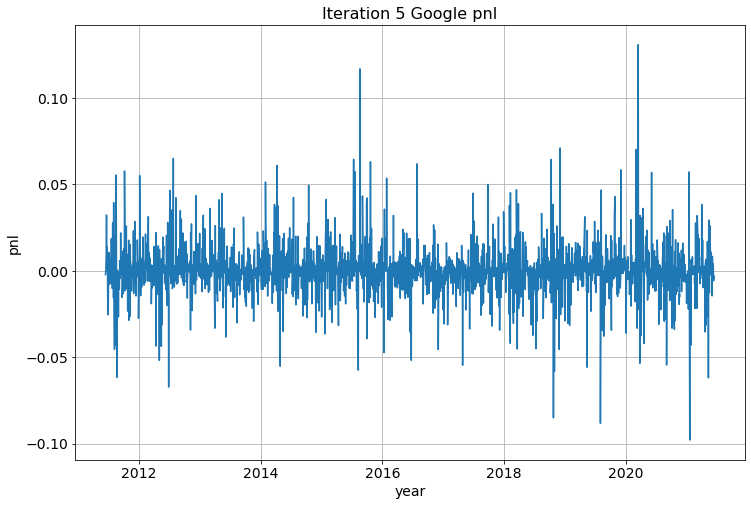

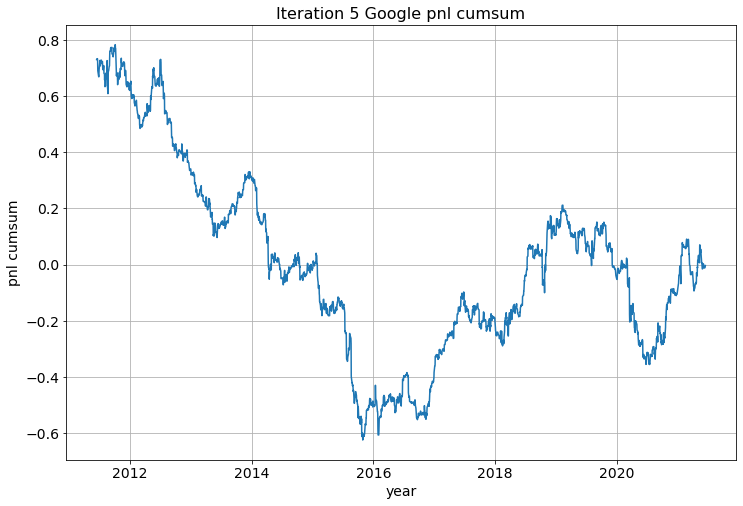

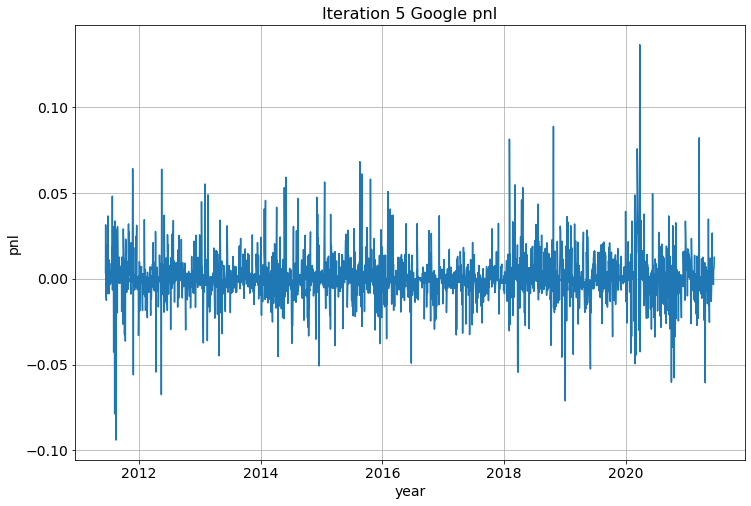

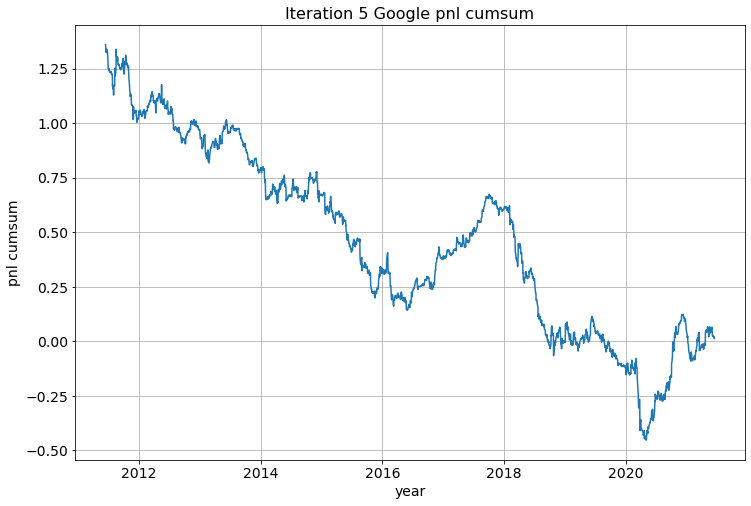

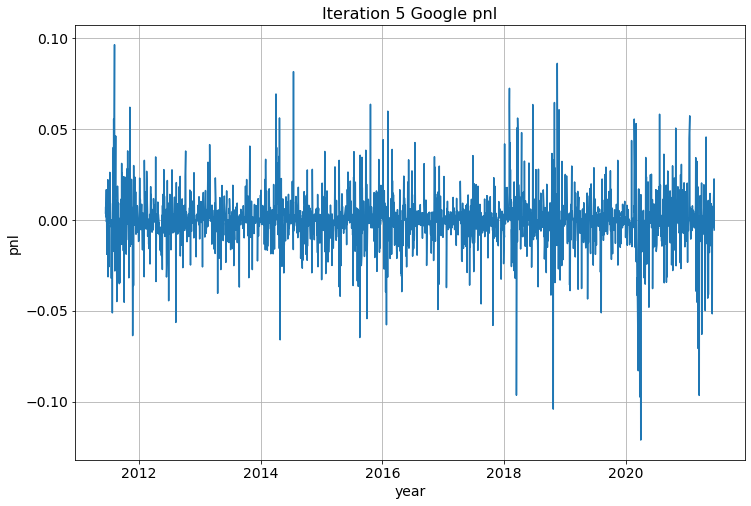

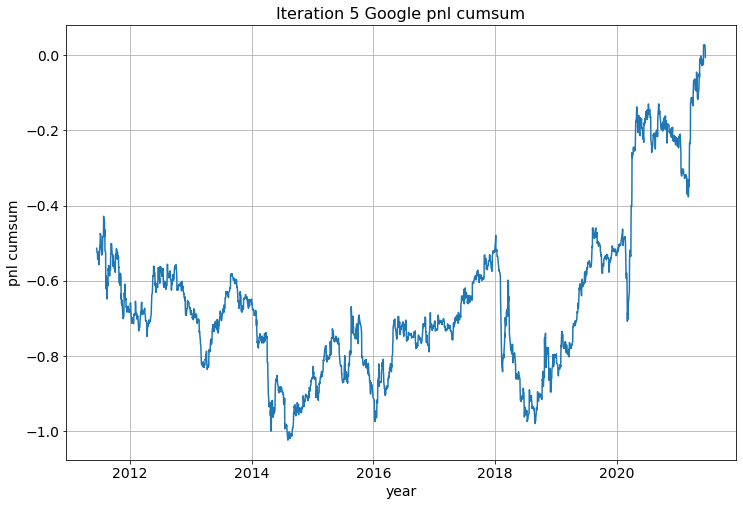

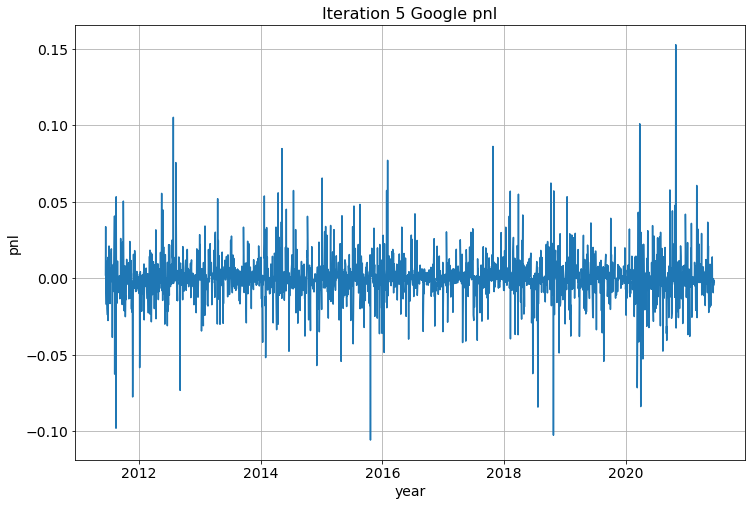

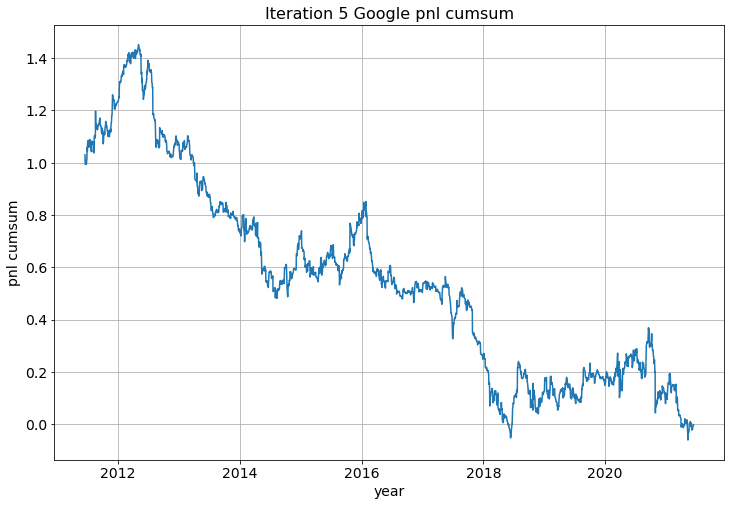

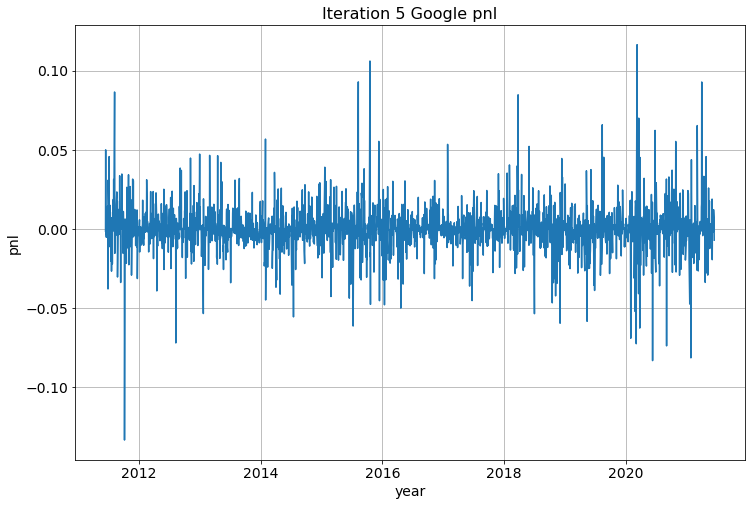

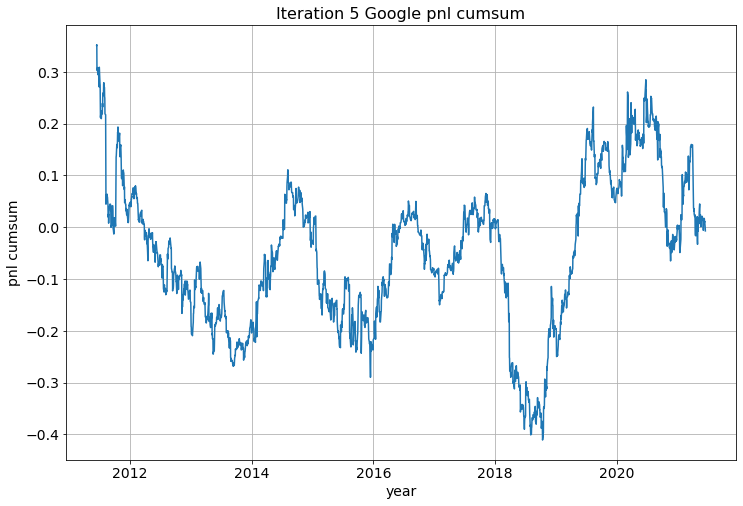

In [244]:
for _ in range(5):
    f = np.random.normal(mu, sigma, len(returns_google_trimmed))
    pnl = f * returns_google_trimmed
    pnl_cumsum = np.cumsum(pnl)
    draw_plot(pnl, f'Iteration {i+1} Google pnl', 'pnl')
    draw_plot(pnl_cumsum, f'Iteration {i+1} Google pnl cumsum', 'pnl cumsum')

## Выводы 

1. Случайные стационарные процессы $r_i$ и $f_i$ порождают случайный стационарный процесс &pnl_i&


2. $cumsum(pnl_i)$  случайно возрастает / убывает.

# Задание 4 

Для временного ряда (например, доходностей) коэффициент Sharpe Ratio определяется как:
$SR = \frac{E[pnl_i]} {\sqrt{V[pnl_i]}} $

Представьте, что каждый день вы делаете случайное предсказание   согласно стандартному распределению для конкретной акции. Качество ваших предсказаний можно охарактеризовать с помощью: $hit rate = \frac{1}{n} (\sum_i I(sign(f_i) == sign(r_i))) $

 
Hit rate - это мера точности: то, как часто наш прогноз совпадает по направлению движения акции.

$f_i$  это случайная величина, имеющая множество реализаций 
    
Постройте scatter plot $SR(pnl_i)$  от hit rate в диапазоне от 0 до 1

## Facebook Sharpe Ratio and hit rate

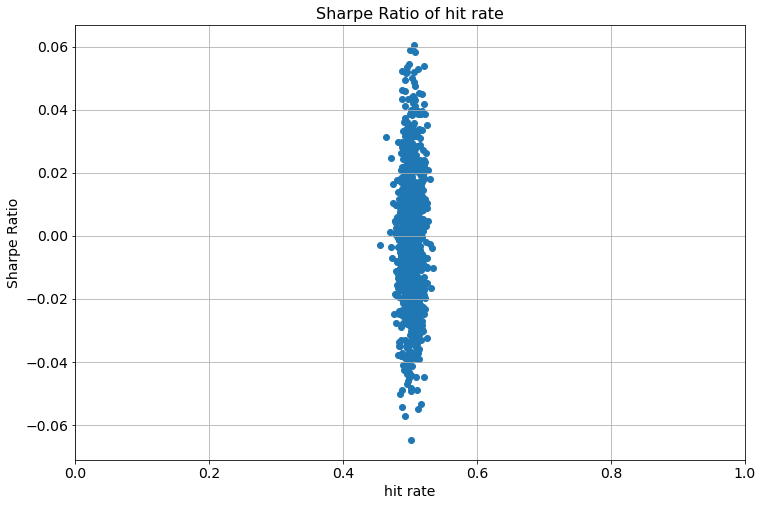

In [173]:
hr_fb = []
sr_fb = []
for _ in range(1000):
    f = np.random.normal(mu, sigma, len(returns_fb_trimmed))
    
    pnl = f * returns_fb_trimmed
    
    sr = pnl.mean() / np.sqrt(np.var(pnl))
    sr_fb.append(sr)
    
    hr = (np.sign(pnl) == np.sign(returns_fb_trimmed)).mean()
    hr_fb.append(hr)
    
plt.figure(figsize=(12, 8))
plt.scatter(hr_fb, sr_fb)
plt.xlim(0, 1)
plt.title('Sharpe Ratio of hit rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hit rate', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.grid()
plt.show()

## Apple Sharpe Ratio and hit rate

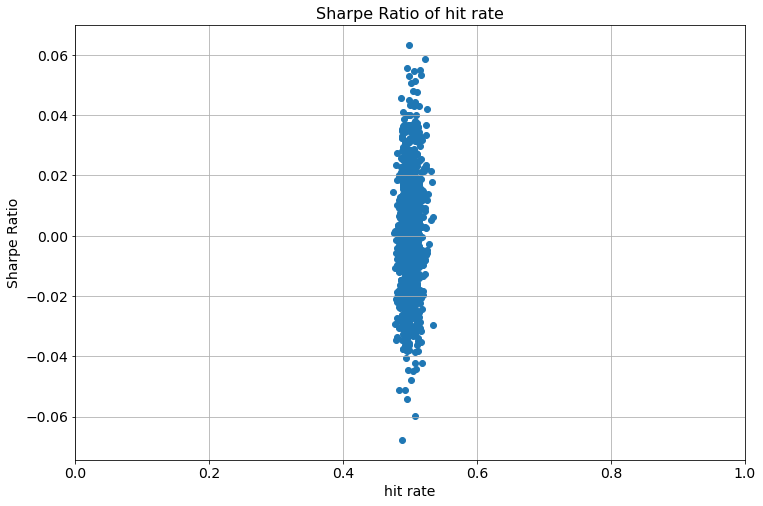

In [178]:
hr_apple = []
sr_apple= []
for _ in range(1000):
    f = np.random.normal(mu, sigma, len(returns_apple_trimmed))
    
    pnl = f * returns_apple_trimmed
    
    sr = pnl.mean() / np.sqrt(np.var(pnl))
    sr_apple.append(sr)
    
    hr = (np.sign(pnl) == np.sign(returns_apple_trimmed)).mean()
    hr_apple.append(hr)
    
plt.figure(figsize=(12, 8))
plt.scatter(hr_apple, sr_apple)
plt.xlim(0, 1)
plt.title('Sharpe Ratio of hit rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hit rate', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.grid()
plt.show()

## Google Sharpe Ratio and hit rate

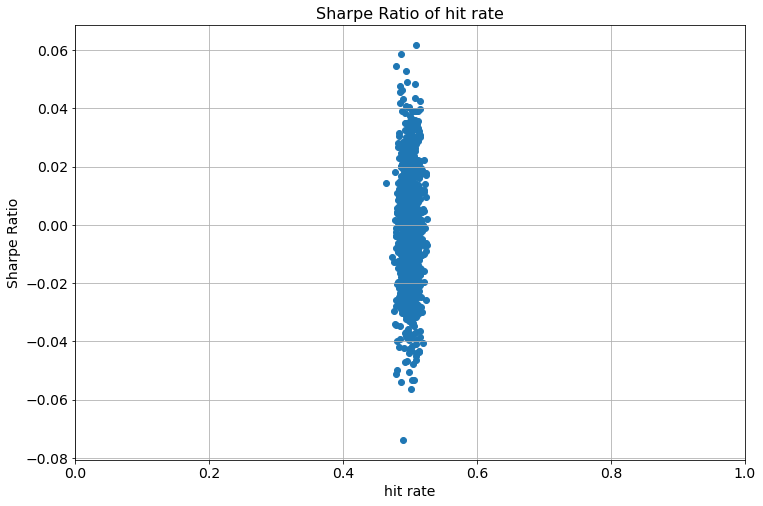

In [179]:
hr_google = []
sr_google = []
for _ in range(1000):
    f = np.random.normal(mu, sigma, len(returns_google_trimmed))
    
    pnl = f * returns_google_trimmed
    
    sr = pnl.mean() / np.sqrt(np.var(pnl))
    sr_google.append(sr)
    
    hr = (np.sign(pnl) == np.sign(returns_google_trimmed)).mean()
    hr_google.append(hr)
    
plt.figure(figsize=(12, 8))
plt.scatter(hr_google, sr_google)
plt.xlim(0, 1)
plt.title('Sharpe Ratio of hit rate', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('hit rate', fontsize=14)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.grid()
plt.show()

## Выводы 

Значения hit rate расположились около 0.5.

То есть при случайном значении реализаций $f_i$ вероятность угадать составляет 50%.